In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
sns.set()

In [3]:
Data = pd.read_csv(r"C:\Users\Hunny Sharma\Desktop\ML\laptop2_data.csv")





In [4]:
Data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
Data.duplicated().sum()

0

In [6]:
Data.shape

(1303, 12)

In [7]:
Data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [8]:
 Data.drop(columns = ['Unnamed: 0'],inplace=True)
Data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
Data['Ram'] = Data['Ram'].str.replace("GB", " ").astype("int32")
Data['Weight']= Data['Weight'].str.replace("kg", " ").astype("float32")
Data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [11]:
Data["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

C:\Users\Hunny Sharma\AppData\Local\Temp\ipykernel_4740\514521534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data["Price"])
C:\Users\Hunny Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

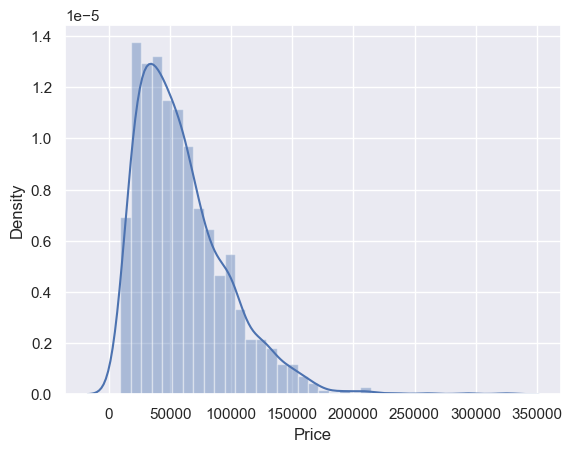

In [12]:
sns.distplot(Data["Price"])

<Axes: xlabel='Company'>

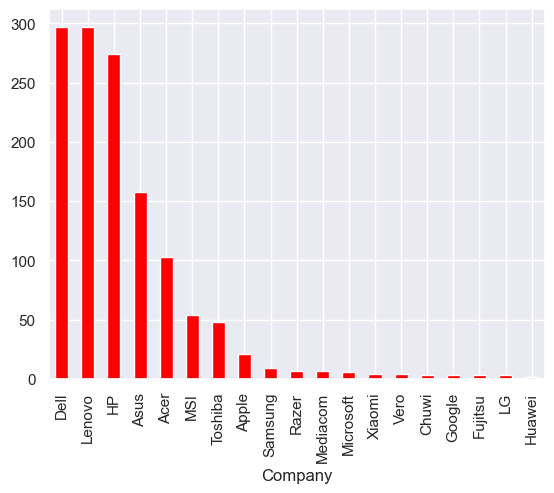

In [13]:
Data["Company"].value_counts().plot(kind="bar", color="red")

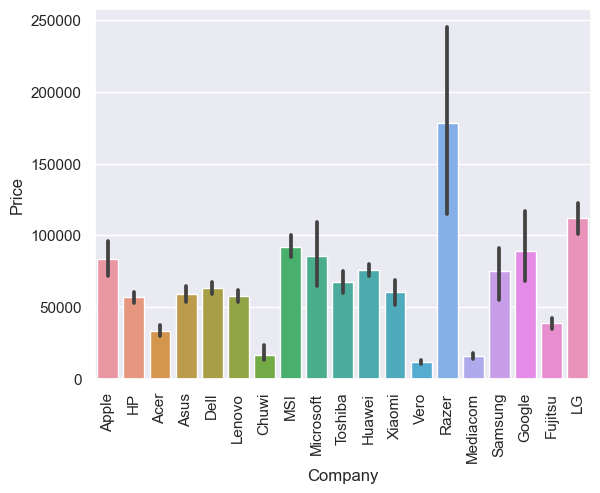

In [14]:
sns.barplot(x=Data["Company"], y=Data["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='TypeName'>

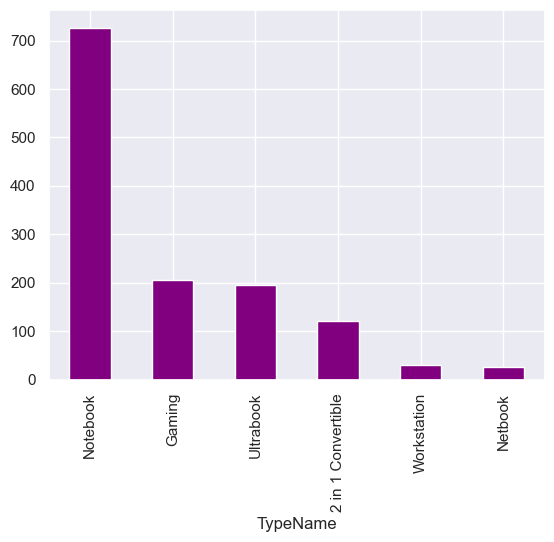

In [15]:
Data["TypeName"].value_counts().plot(kind="bar", color = "Purple")

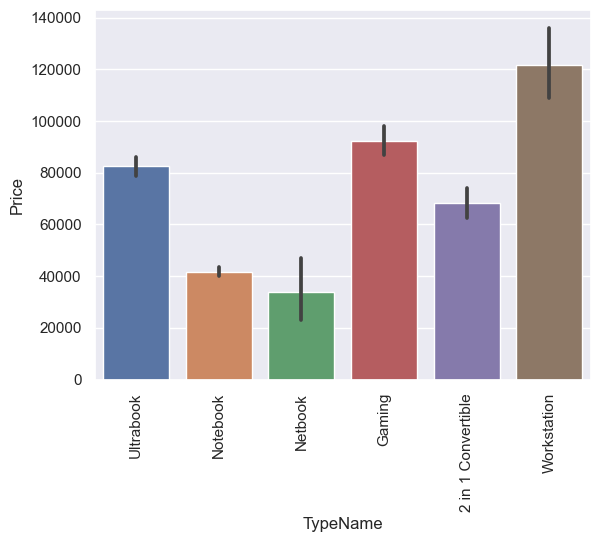

In [16]:
sns.barplot(x=Data["TypeName"], y=Data["Price"])
plt.xticks(rotation="vertical")
plt.show()

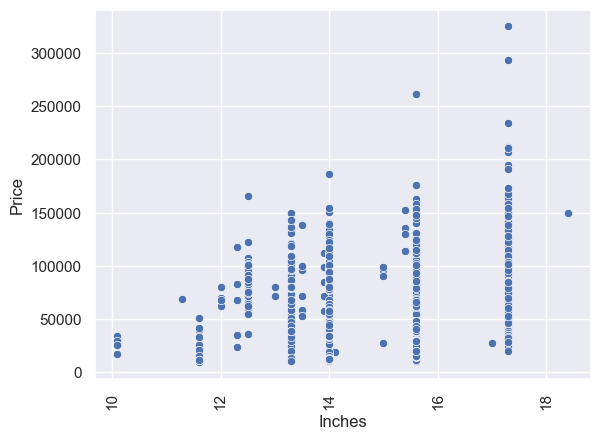

In [17]:
sns.scatterplot(x=Data["Inches"], y=Data["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [18]:
Data["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [19]:
Data["Touchscreen"]= Data["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)
Data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1092,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85194.72,0
283,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,30849.12,0
737,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.55,35111.52,1
934,Toshiba,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.47,58874.40,0
756,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,58554.72,0


<Axes: xlabel='Touchscreen'>

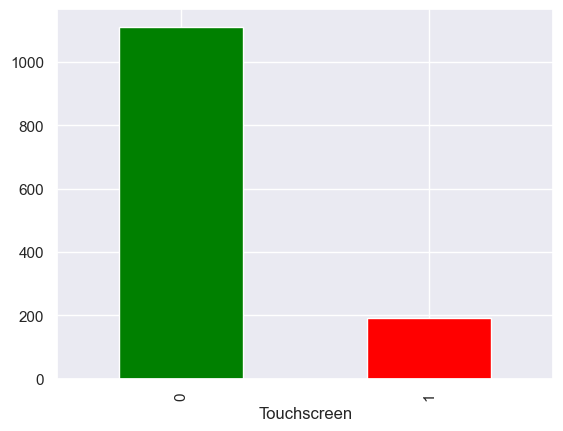

In [20]:
#here 1 presents  touchscreen and 0 for no touchscreen  

Data["Touchscreen"].value_counts().plot(kind="bar", color=["green", "red"])



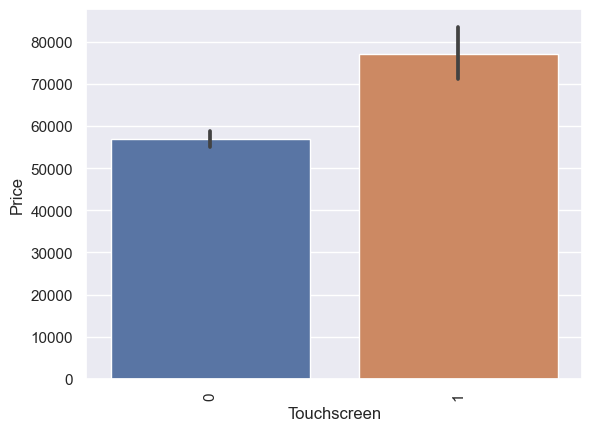

In [21]:
sns.barplot(x=Data["Touchscreen"], y=Data["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [22]:
Data["IPS"]= Data["ScreenResolution"].apply(lambda x:1 if 'IPS' in x else 0)
Data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS', ylabel='Price'>

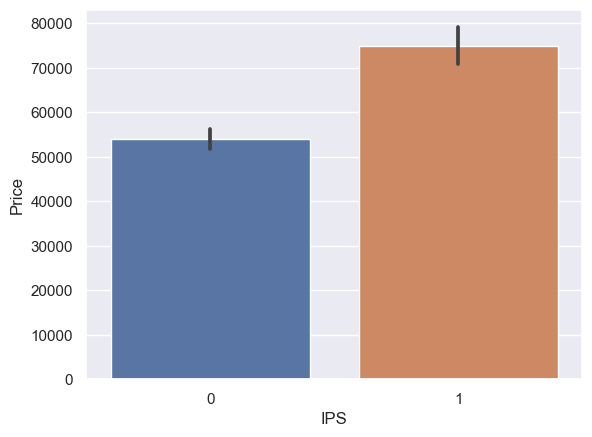

In [23]:
sns.barplot(x=Data["IPS"],y=Data["Price"])

In [24]:
new=Data['ScreenResolution'].str.split("x", n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [25]:
Data["x_res"]=new[0]
Data["y_res"]=new[1]


In [26]:
Data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [27]:
Data["x_res"]=Data["x_res"].str.replace(",", " ").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
Data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [28]:
Data['x_res']=Data['x_res'].astype(int)
Data["y_res"]=Data["y_res"].astype(int)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [29]:

# Step : Identify columns with string values and exclude them
numeric_columns = Data.select_dtypes(include=['number']).columns

# Step : Calculate the correlation between 'price' column and all numeric columns
correlation_results = Data[numeric_columns].corrwith(Data['Price'])

# Display the correlation results

print(correlation_results)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
dtype: float64


In [30]:
Data['ppi'] = (((Data['x_res']**2) + (Data['y_res']**2))**0.5/Data['Inches']).astype('float')


In [31]:
Data[numeric_columns].corrwith(Data['Price'])


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
dtype: float64

In [32]:
Data.drop(columns='ScreenResolution', inplace=True)
Data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [33]:
Data.drop(columns=['x_res','Inches','y_res'], inplace=True)
Data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [34]:
Data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [35]:
Data['Cpu Name'] = Data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
Data['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu Name, Length: 1303, dtype: object

In [36]:
Data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [37]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [38]:
Data['Cpu brand'] = Data['Cpu Name'].apply(fetch_processor)
Data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

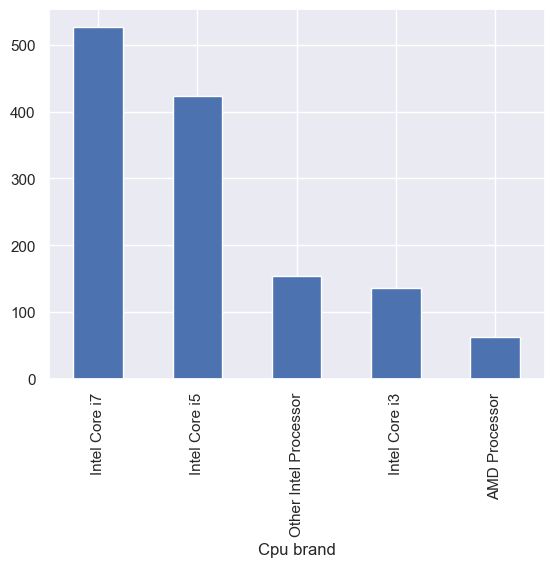

In [39]:
Data['Cpu brand'].value_counts().plot(kind='bar')

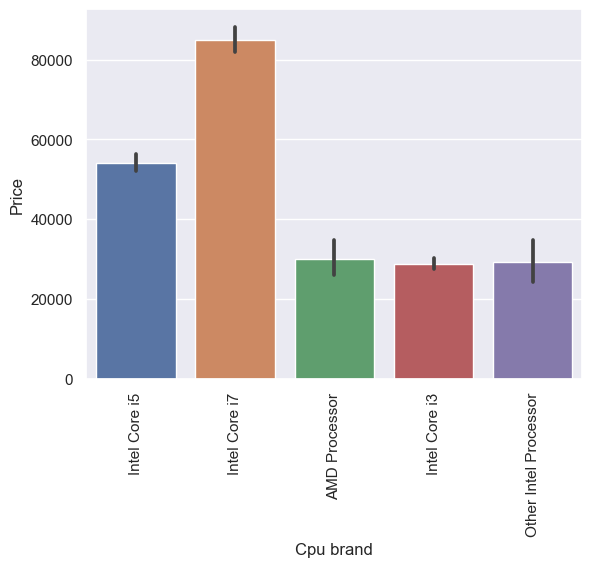

In [40]:
sns.barplot(x=Data['Cpu brand'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
Data.drop(columns=['Cpu','Cpu Name'],inplace=True)

<Axes: xlabel='Ram'>

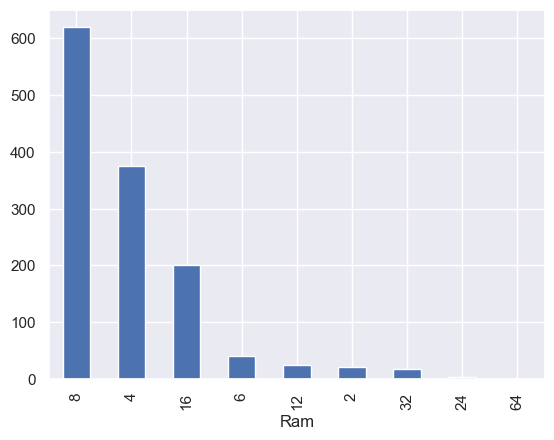

In [42]:
Data['Ram'].value_counts().plot(kind='bar')

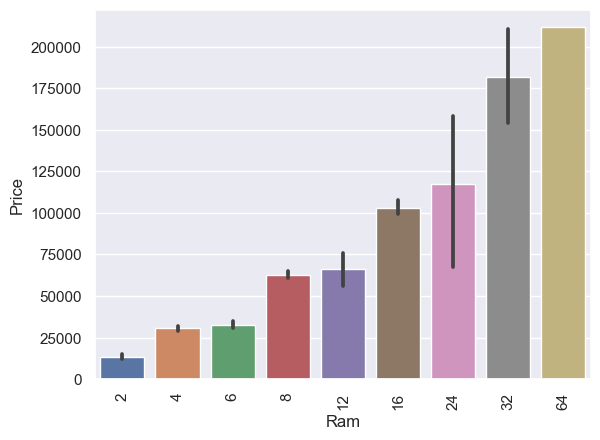

In [43]:
sns.barplot(x=Data['Ram'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
Data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [45]:
Data['Memory'] = Data['Memory'].astype(str).replace('\.0', '', regex=True)
Data["Memory"] = Data["Memory"].str.replace('GB', '')
Data["Memory"] = Data["Memory"].str.replace('TB', '000')
new = Data["Memory"].str.split("+", n = 1, expand = True)

Data["first"]= new[0]
Data["first"]=Data["first"].str.strip()

Data["second"]= new[1]

Data["Layer1HDD"] = Data["first"].apply(lambda x: 1 if "HDD" in x else 0)
Data["Layer1SSD"] = Data["first"].apply(lambda x: 1 if "SSD" in x else 0)
Data["Layer1Hybrid"] = Data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
Data["Layer1Flash_Storage"] = Data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

Data['first'] = Data['first'].str.replace(r'\D', '')

Data["second"].fillna("0", inplace = True)

Data["Layer2HDD"] = Data["second"].apply(lambda x: 1 if "HDD" in x else 0)
Data["Layer2SSD"] = Data["second"].apply(lambda x: 1 if "SSD" in x else 0)
Data["Layer2Hybrid"] = Data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
Data["Layer2Flash_Storage"] = Data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

Data['second'] = Data['second'].str.replace(r'\D', '')

Data["first"] = Data["first"].apply(lambda x: int(re.sub(r'\D', '', x)) if re.sub(r'\D', '', x) else 0)
Data["second"] = Data["second"].apply(lambda x: int(re.sub(r'\D', '', x)) if re.sub(r'\D', '', x) else 0)

Data["HDD"]=(Data["first"]*Data["Layer1HDD"]+Data["second"]*Data["Layer2HDD"])
Data["SSD"]=(Data["first"]*Data["Layer1SSD"]+Data["second"]*Data["Layer2SSD"])
Data["Hybrid"]=(Data["first"]*Data["Layer1Hybrid"]+Data["second"]*Data["Layer2Hybrid"])
Data["Flash_Storage"]=(Data["first"]*Data["Layer1Flash_Storage"]+Data["second"]*Data["Layer2Flash_Storage"])

Data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)
Data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1279,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,0,1,141.211998,Intel Core i7,1000,0,0,0
1284,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,157.350512,Intel Core i7,0,128,0,0
918,Dell,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,71874.72,0,0,141.211998,Intel Core i7,1000,128,0,0
250,Dell,2 in 1 Convertible,8,1000 HDD,Intel UHD Graphics 620,Windows 10,2.08,43636.32,1,1,141.211998,Intel Core i7,1000,0,0,0
1079,HP,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 7,2.31,50083.20,0,0,141.211998,Intel Core i5,500,0,0,0


In [46]:

Data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1027,HP,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.95,56476.80,0,0,111.935204,Intel Core i5,500,0,0,0
324,Acer,Notebook,8,256 SSD,AMD Radeon RX 540,Windows 10,2.20,35111.52,0,0,100.454670,AMD Processor,0,256,0,0
156,Lenovo,2 in 1 Convertible,4,256 SSD,Intel HD Graphics 620,Windows 10,1.74,33513.12,1,1,157.350512,Intel Core i3,0,256,0,0
1278,Dell,Notebook,2,500 HDD,Intel HD Graphics,Windows 10,2.20,20193.12,0,0,100.454670,Other Intel Processor,500,0,0,0
430,Samsung,Netbook,4,16 Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.32,0,0,135.094211,Other Intel Processor,0,0,0,16


In [47]:
Data.drop(columns=['Memory'],inplace=True)

In [48]:
Data

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [49]:
numeric_columns = Data.select_dtypes(include=['number']).columns
Data[numeric_columns].corrwith(Data['Price'])


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
dtype: float64

In [50]:
Data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [51]:
Data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [52]:
Data['Gpu brand'] = Data['Gpu'].apply(lambda x:x.split()[0])

In [53]:
Data['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [54]:
Data = Data[Data['Gpu brand'] != 'ARM']

In [55]:
Data['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

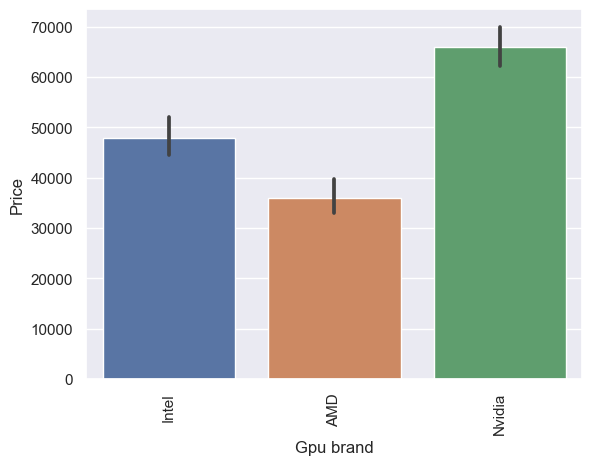

In [56]:
sns.barplot(x=Data['Gpu brand'],y=Data['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
Data.drop(columns=['Gpu'],inplace=True)


C:\Users\Hunny Sharma\AppData\Local\Temp\ipykernel_4740\76918628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns=['Gpu'],inplace=True)


In [58]:
Data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

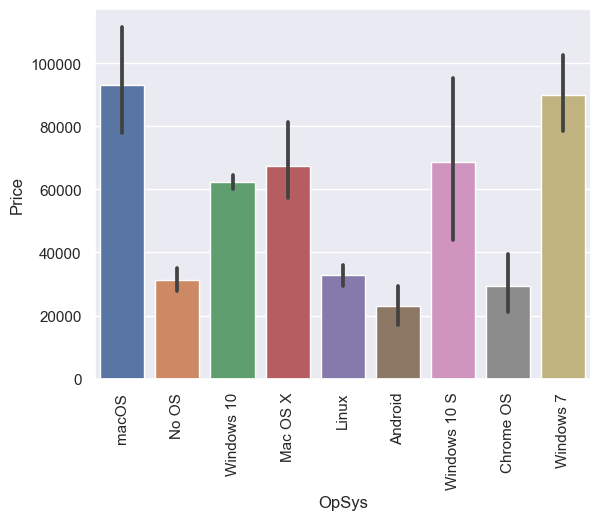

In [59]:
sns.barplot(x=Data['OpSys'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [61]:
Data['os'] = Data['OpSys'].apply(cat_os)

C:\Users\Hunny Sharma\AppData\Local\Temp\ipykernel_4740\2111796305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['os'] = Data['OpSys'].apply(cat_os)


In [62]:
Data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [63]:
Data.drop(columns=['OpSys'],inplace=True)

C:\Users\Hunny Sharma\AppData\Local\Temp\ipykernel_4740\891004568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.drop(columns=['OpSys'],inplace=True)


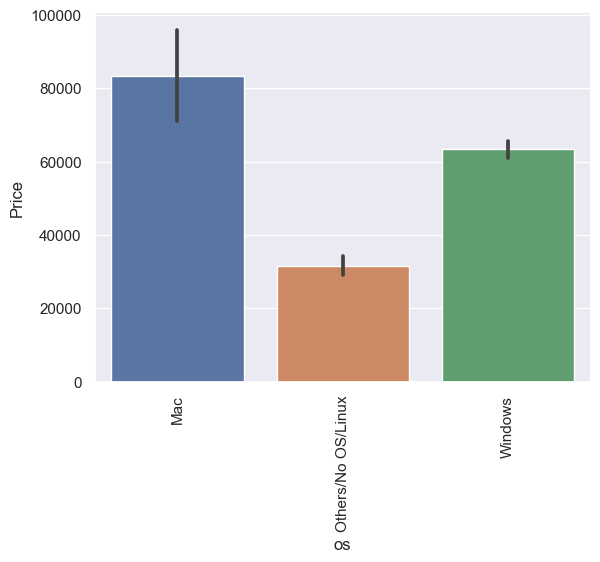

In [64]:
sns.barplot(x=Data['os'],y=Data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

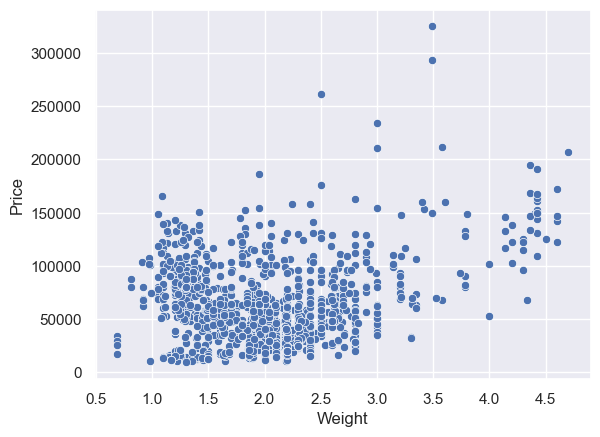

In [65]:
sns.scatterplot(x=Data['Weight'],y=Data['Price'])

In [66]:
numeric_columns = Data.select_dtypes(include=['number']).columns
correlation_results=Data[numeric_columns].corrwith(Data['Price'])

C:\Users\Hunny Sharma\AppData\Local\Temp\ipykernel_4740\2710458092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(Data['Price']))
C:\Users\Hunny Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

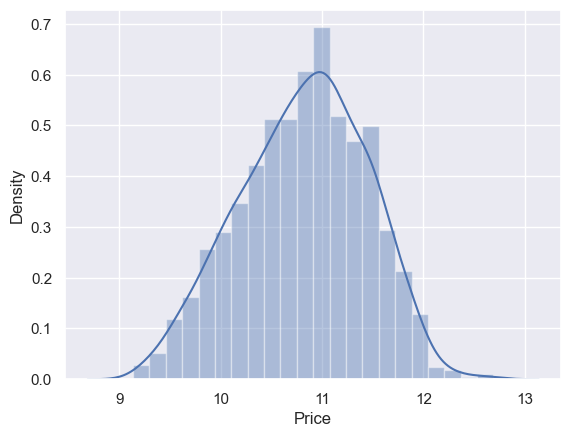

In [67]:
sns.distplot(np.log(Data['Price']))

In [68]:
X = Data.drop(columns=['Price'])


y = (Data['Price'])

In [69]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [70]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1302, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [72]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


LINEAR REGRESSION


In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7177391544744363
MAE 12535.79699392973


C:\Users\Hunny Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNeighborsRegressor

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Hunny Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.6664359823570845
MAE 11425.123983673471


 Decision Tree

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7649829693210906
MAE 10777.568512640442


C:\Users\Hunny Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVM

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Hunny Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.5394366345493855
MAE 15429.141206065116


Random Forest

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Hunny Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8196209205661376
MAE 9296.072297265368
